# MNIST 데이터셋 분석

In [ ]:
import sys, os
sys.path.append('deep-learning-from-scratch-master')
import numpy as np 
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 1, 28, 28)
(60000,)
(10000, 1, 28, 28)
(10000,)


In [ ]:
print(x_train[0])

[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126
   136 175  26 166 255 247 127   0   0   0   0]
  [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253
   253 225 172 253 242 195  64   0   0   0   0]
  [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253
   251  93  82  82  56  39   0   0   0   0   0]
  [  0   0   0   0   0   0   0  18 219 253 253 2

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다. 
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))


학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

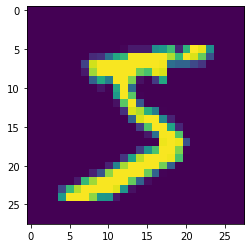

In [ ]:
# 첫번째 이미지 확인 
plt.imshow(X_train[0])
plt.show()

In [ ]:
from PIL import Image 
Image.fromarray(X_train[0])

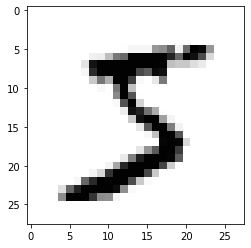

In [ ]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [ ]:
# 이미지가 인식되는 원리를 알아봅시다.
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')


0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [ ]:
# 정답 
y_train[0]

5

In [ ]:
# 변형시키기 
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 28*28)
print(X_train.shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# MNIST 데이터를 불러옵니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후, 테스트셋과 학습셋으로 나눕니다.
# type을 왜 바꿀까?
X_train = X_train.reshape(X_train.shape[0], 28*28).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

# one_hot_encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
X_train[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# 모델 구조 설정 
model = Sequential()
model.add(Dense(512, input_dim=784, activation='sigmoid'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()     # 모델 살펴보기


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
# 모델 실행 환경을 설정합니다. 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=1)

Epoch 1/30
225/225 [==============================] - 21s 71ms/step - loss: 0.7324 - accuracy: 0.7885 - val_loss: 0.3117 - val_accuracy: 0.9038
Epoch 2/30
225/225 [==============================] - 17s 76ms/step - loss: 0.2719 - accuracy: 0.9208 - val_loss: 0.2371 - val_accuracy: 0.9303
Epoch 3/30
225/225 [==============================] - 14s 61ms/step - loss: 0.2172 - accuracy: 0.9359 - val_loss: 0.1970 - val_accuracy: 0.9433
Epoch 4/30
225/225 [==============================] - 14s 63ms/step - loss: 0.1751 - accuracy: 0.9482 - val_loss: 0.1735 - val_accuracy: 0.9499
Epoch 5/30
225/225 [==============================] - 15s 67ms/step - loss: 0.1485 - accuracy: 0.9559 - val_loss: 0.1589 - val_accuracy: 0.9523
Epoch 6/30
225/225 [==============================] - 16s 71ms/step - loss: 0.1222 - accuracy: 0.9640 - val_loss: 0.1537 - val_accuracy: 0.9553
Epoch 7/30
225/225 [==============================] - 16s 69ms/step - loss: 0.1031 - accuracy: 0.9697 - val_loss: 0.1364 - val_accuracy:

In [ ]:
import sys, os
sys.path.append('deep-learning-from-scratch-master')
import numpy as np 
from dataset.mnist import load_mnist
from PIL import Image 

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img) # 사진 프로그램으로 실행됨

5
(1, 28, 28)
(28, 28)


In [ ]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("deep-learning-from-scratch-master/ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [ ]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape) 
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


train acc, test acc | 0.0974, 0.0982
train acc, test acc | 0.8003833333333333, 0.8026
train acc, test acc | 0.8789333333333333, 0.8818
train acc, test acc | 0.8982833333333333, 0.9009
train acc, test acc | 0.9073833333333333, 0.9108
train acc, test acc | 0.9142166666666667, 0.916
train acc, test acc | 0.9194833333333333, 0.9201
train acc, test acc | 0.9242833333333333, 0.9246
train acc, test acc | 0.9276833333333333, 0.9281
train acc, test acc | 0.9314333333333333, 0.9316
train acc, test acc | 0.93325, 0.9346
train acc, test acc | 0.9359666666666666, 0.9357
train acc, test acc | 0.9386166666666667, 0.9382
train acc, test acc | 0.9413166666666667, 0.9406
train acc, test acc | 0.94295, 0.9406
train acc, test acc | 0.945, 0.9442
train acc, test acc | 0.94715, 0.9466


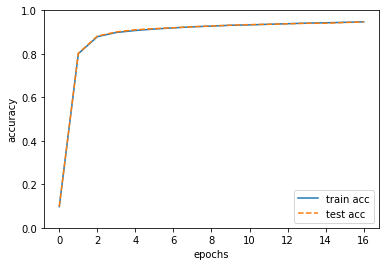

In [92]:
import sys, os 
sys.path.append("deep-learning-from-scratch-master/ch04")
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_lost_lit = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


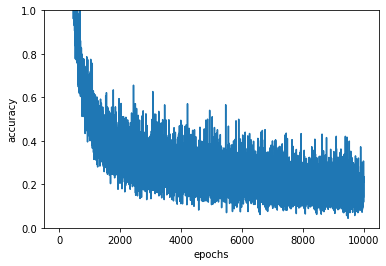

In [94]:

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.show()

# 당뇨 환자 데이터셋 분석

In [1]:
# 텐서플로 라이브러리 안에 있는 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터를 다루는 데 필요한 라이브러리를 불러옵니다.
import numpy as np

# 준비된 수술 환자 데이터를 불러옵니다.
Data_set = np.loadtxt("data/ThoraricSurgery3.csv", delimiter=",") 

X = Data_set[:,0:16]  # 환자의 진찰 기록을 X로 지정합니다.
y = Data_set[:,16]    # 수술 1년 후 사망/생존 여부를 y로 지정합니다.

# 딥러닝 모델의 구조를 결정합니다.
model = Sequential()
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 딥러닝 모델을 실행합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=5, batch_size=16)

Epoch 1/5
30/30 [==============================] - 6s 15ms/step - loss: 12.4576 - accuracy: 0.1489
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 2.8418 - accuracy: 0.3596
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.5474 - accuracy: 0.8511
Epoch 4/5
30/30 [==============================] - 0s 10ms/step - loss: 0.4935 - accuracy: 0.8489
Epoch 5/5
30/30 [==============================] - 1s 18ms/step - loss: 0.4842 - accuracy: 0.8511


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv('data/pima-indians-diabetes3.csv')

df.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# 정상과 당뇨 환자의 수 조사하기 
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [4]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


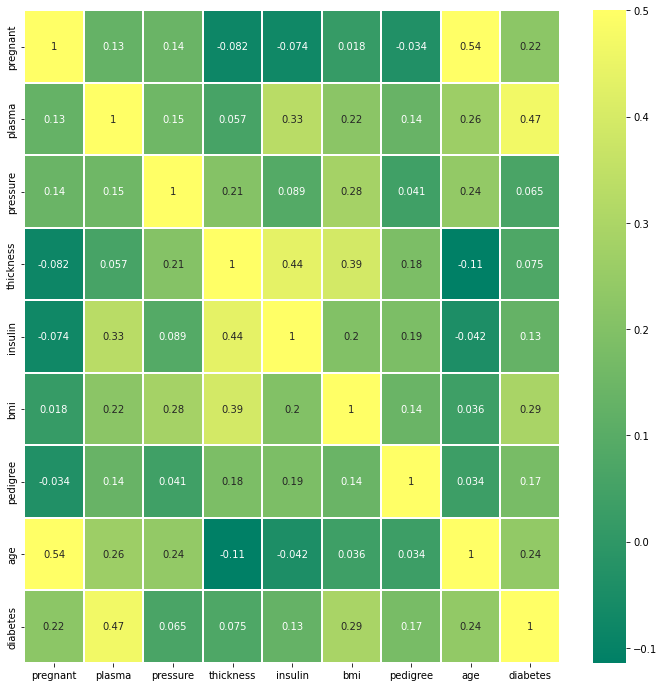

In [9]:
import seaborn as sns 

plt.figure(figsize=(12, 12))

sns.heatmap(df.corr(), linewidth=0.1, vmax=0.5, cmap='summer', linecolor='white', annot=True)
plt.show()

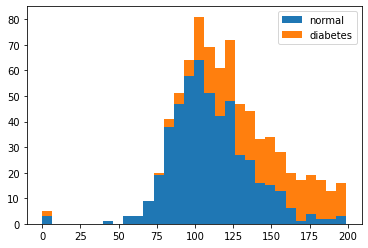

In [10]:
#plasma를 기준으로 각각 정상과 당뇨가 어느 정도 비율로 분포하는지 살펴봅니다. 
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30, 
         histtype='barstacked', label=['normal','diabetes'])
plt.legend()
plt.show()

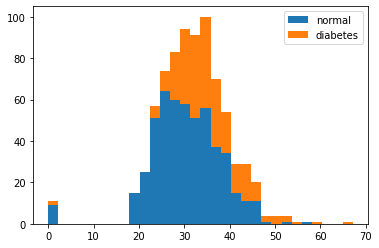

In [13]:
#plasma를 기준으로 각각 정상과 당뇨가 어느 정도 비율로 분포하는지 살펴봅니다. 
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, 
         histtype='barstacked', label=['normal','diabetes'])
plt.legend()
plt.show()

In [49]:
# 텐서플로 라이브러리 안에 있는 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터를 다루는 데 필요한 라이브러리를 불러옵니다.
import numpy as np

X = df.drop('diabetes', axis=1)  # 환자의 진찰 기록을 X로 지정합니다.
y = df['diabetes']    # 수술 1년 후 사망/생존 여부를 y로 지정합니다.

# 딥러닝 모델의 구조를 결정합니다.
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 딥러닝 모델을 실행합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
77/77 [==============================] - 6s 11ms/step - loss: 2.8820 - accuracy: 0.5742
Epoch 2/100
77/77 [==============================] - 1s 15ms/step - loss: 0.7847 - accuracy: 0.6250
Epoch 3/100
77/77 [==============================] - 2s 20ms/step - loss: 0.7087 - accuracy: 0.6484
Epoch 4/100
77/77 [==============================] - 1s 11ms/step - loss: 0.7278 - accuracy: 0.6536
Epoch 5/100
77/77 [==============================] - 1s 10ms/step - loss: 0.6692 - accuracy: 0.6927
Epoch 6/100
77/77 [==============================] - 1s 10ms/step - loss: 0.6640 - accuracy: 0.6693
Epoch 7/100
77/77 [==============================] - 1s 12ms/step - loss: 0.6356 - accuracy: 0.6953
Epoch 8/100
77/77 [==============================] - 1s 18ms/step - loss: 0.6021 - accuracy: 0.6901
Epoch 9/100
77/77 [==============================] - 1s 16ms/step - loss: 0.5909 - accuracy: 0.7240
Epoch 10/100
77/77 [==============================] - 1s 19ms/step - loss: 0.6072 - accuracy: 0.7122

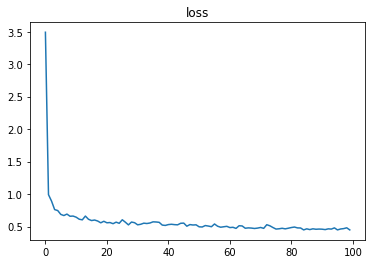

In [46]:
plt.plot(history.history['loss'])
plt.title('loss')
plt.show()

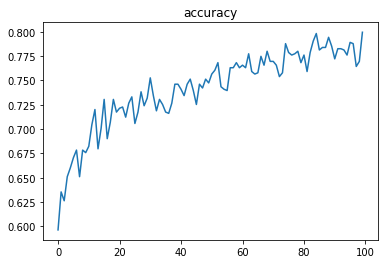

In [47]:
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.show()

In [21]:
df.shape

(768, 9)